Vamos a hacer una predicción con el set de datos de Market Basket usando Apriori

**Importar Librerías ¿Cuáles?**  

- DataSets - Market Basket
- apriori 
    - from apyori import apriori



**Estructura del programa**

- Importo librerías
- Selecciono el dataset
- Preprocesamiento - Normalización - Limpieza
- Podemos visualizar un poco la data (Exploración de los Datos)
- Hago la predicción con el clasificador seleccionado

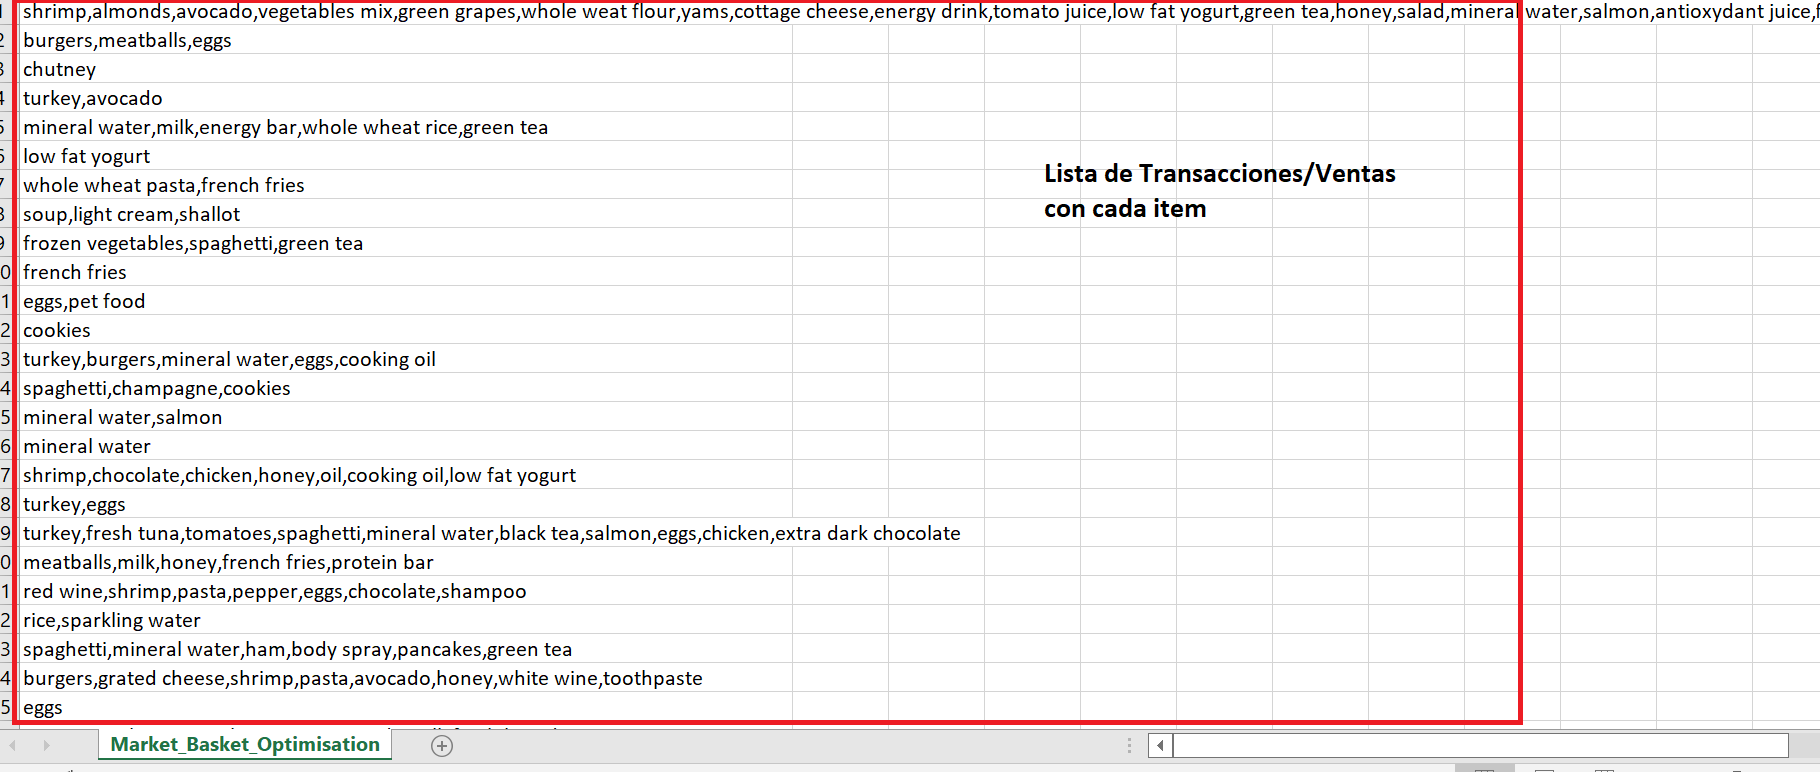

Cargamos las librerias necesarias

In [3]:
import pandas as pd
from apyori import apriori

Importamos el archivo de transacciones

In [14]:
dataset = pd.read_csv('Market_Basket_Optimisation.csv', header = None)
dataset.head()

0          1           2                 3             4   \
0         shrimp    almonds     avocado    vegetables mix  green grapes   
1        burgers  meatballs        eggs               NaN           NaN   
2        chutney        NaN         NaN               NaN           NaN   
3         turkey    avocado         NaN               NaN           NaN   
4  mineral water       milk  energy bar  whole wheat rice     green tea   

                 5     6               7             8             9   \
0  whole weat flour  yams  cottage cheese  energy drink  tomato juice   
1               NaN   NaN             NaN           NaN           NaN   
2               NaN   NaN             NaN           NaN           NaN   
3               NaN   NaN             NaN           NaN           NaN   
4               NaN   NaN             NaN           NaN           NaN   

               10         11     12     13             14      15  \
0  low fat yogurt  green tea  honey  salad  mineral water  salmon   
1             NaN        NaN    NaN    NaN            NaN     NaN   
2             NaN        NaN    NaN    NaN            NaN     NaN   
3             NaN        NaN    NaN    NaN            NaN     NaN   
4             NaN        NaN    NaN    NaN            NaN     NaN   

                  16               17       18         19  
0  antioxydant juice  frozen smoothie  spinach  olive oil  
1                NaN              NaN      NaN        NaN  
2                NaN              NaN      NaN        NaN  
3                NaN              NaN      NaN        NaN  
4                NaN              NaN      NaN        NaN

Recorro el dataset para asignarlo a transactions

In [5]:
transactions = []
for i in range(0, 7501):
    transactions.append([str(dataset.values[i,j]) for j in range(0, 20)])

Entrenamiento del Dataset con Apriori

In [6]:
rules = apriori(transactions, min_support = 0.003, min_confidence = 0.2, min_lift = 3, min_length = 2)


Evaluación de los Resultados

In [7]:
results = list(rules)
def inspect(results):
    lh          = [tuple(result[2][0][1]) for result in results] 
    rh 			= [tuple(result[2][0][0]) for result in results]
    supports    = [result[1] for result in results]
    confidences = [result[2][0][2] for result in results]
    lifts       = [result[2][0][3] for result in results]
    return list(zip(rh, lh, supports, confidences, lifts))

Creamos un Dataframe para evaluar/ver los resultados


In [8]:
resultDataFrame=pd.DataFrame(inspect(results),
                columns=['lhs (left hand side) Ancedente','rhs (rignt hand side) Consecuente','support','confidence','lift'])


Imprimimo el dataframe con los resultados de lsa reglas

In [12]:
pd.set_option("max_rows", None)

In [13]:
resultDataFrame.head(160)

lhs (left hand side) Ancedente  \
0                                   (light cream,)   
1                          (mushroom cream sauce,)   
2                                         (pasta,)   
3                                 (fromage blanc,)   
4                                 (herb & pepper,)   
5                                  (tomato sauce,)   
6                                   (light cream,)   
7                             (whole wheat pasta,)   
8                                         (pasta,)   
9                             (avocado, spaghetti)   
10                                    (cake, milk)   
11                             (chocolate, turkey)   
12                                  (milk, turkey)   
13                       (cake, frozen vegetables)   
14                          (ground beef, cereals)   
15                          (ground beef, chicken)   
16                                  (light cream,)   
17                                 (chicken, milk)   
18                            (chicken, spaghetti)   
19                  (frozen vegetables, chocolate)   
20                      (chocolate, herb & pepper)   
21                               (soup, chocolate)   
22                      (ground beef, cooking oil)   
23                             (eggs, ground beef)   
24                                (eggs, red wine)   
25                         (mushroom cream sauce,)   
26                                        (pasta,)   
27                     (ground beef, french fries)   
28                                (fromage blanc,)   
29                  (frozen vegetables, green tea)   
30                  (frozen vegetables, spaghetti)   
31                       (frozen vegetables, milk)   
32                       (soup, frozen vegetables)   
33                                (tomatoes, milk)   
34                         (mineral water, shrimp)   
35                  (frozen vegetables, spaghetti)   
36                  (frozen vegetables, spaghetti)   
37                     (frozen vegetables, shrimp)   
38                  (frozen vegetables, spaghetti)   
39                      (spaghetti, grated cheese)   
40                        (ground beef, green tea)   
41                           (milk, herb & pepper)   
42                  (mineral water, herb & pepper)   
43                                (herb & pepper,)   
44                      (spaghetti, herb & pepper)   
45                             (ground beef, milk)   
46                             (ground beef, soup)   
47                                 (tomato sauce,)   
48                             (pepper, spaghetti)   
49                           (ground beef, shrimp)   
50                                 (tomato sauce,)   
51                                  (light cream,)   
52                                  (light cream,)   
53                             (olive oil, shrimp)   
54                               (olive oil, milk)   
55                               (milk, spaghetti)   
56                                (tomatoes, milk)   
57                  (whole wheat pasta, spaghetti)   
58                           (soup, mineral water)   
59              (whole wheat pasta, mineral water)   
60                            (whole wheat pasta,)   
61                                        (pasta,)   
62                           (spaghetti, pancakes)   
63                           (olive oil, tomatoes)   
64                   (whole wheat rice, spaghetti)   
65                            (avocado, spaghetti)   
66                                    (cake, milk)   
67                             (chocolate, turkey)   
68                                  (milk, turkey)   
69                       (cake, frozen vegetables)   
70                          (ground beef, cereals)   
71                          (ground beef, chicken)   
72                                 (chicken, milk)   
73                      

Observamos las reglas resultantes con 2, 3 o más artículos que implican otro grupo de
productos y tenemos también el soporte, confianza y el lift.

**Interpretación de los resultados**

Los resultados que se han obtenido dicen cosas interesantes. Analizando la primera regla
se puede observar que los clientes que han comprado crema light también aparece
pollo con un soporte de 0,045 y una confianza de 0,29. Esto indica que en el 4,5% de las 
transacciones contienen ambas referencias. Además, la confianza indica que en el 29% de
los casos que se compra crema light también aparece pollo.
La mejora de la confianza (lift) de 4,84 indica que cuando aparece crema light aparece la
otra referencia 4 veces más de lo que se podría esperar por azar.
Recordando una de las definiciones arriba decíamos que “Cuanto más se aleje el valor
de lift de 1, más evidencias de que la regla no se debe a un artefacto aleatorio, es decir,
mayor la evidencia de que la regla representa un patrón real.”